In [1]:
import torch
import phate
import scprep
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

sys.path.append("../")
from src.fim_noemb import FIM_noemb
from src.data.make_dataset import make_n_sphere, make_tree

/home/mila/g/guillaume.huguet/.conda/envs/phate_fim/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
dim = 10
tree_phate, X = make_tree(dim=dim)

In [16]:
fim_operator = FIM_noemb(kernel="gaussian", bandwidth=10, t=2)
V = fim_operator.get_volume(X)

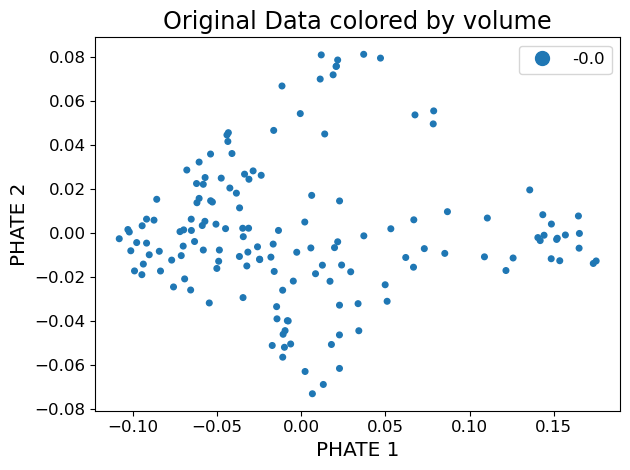

In [17]:
# Visualize Original PHATE data with volume measurement
# Visualize ground truth
cax = scprep.plot.scatter2d(
    tree_phate,
    c=V,
    title="Original Data colored by volume",
    xlabel="PHATE 1",
    ylabel="PHATE 2",
)

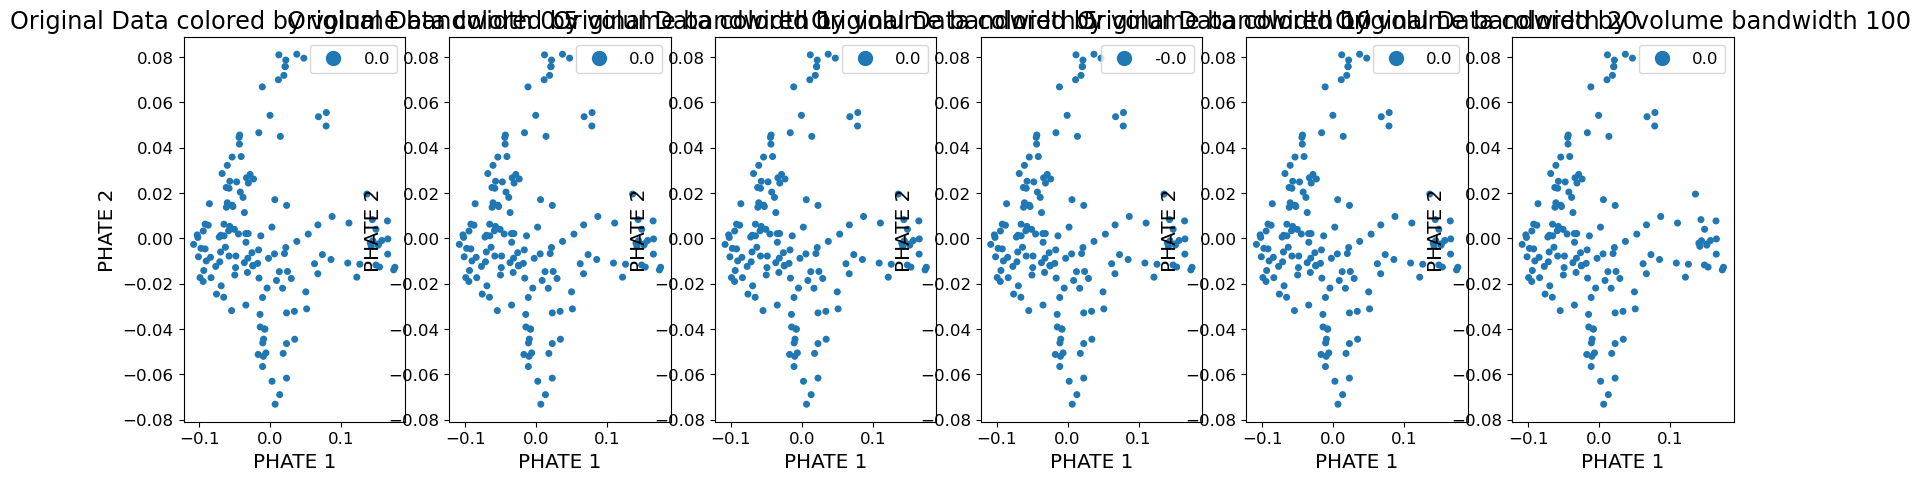

In [ ]:
band_list = [0.5, 1, 5, 10]
fig, axes = plt.subplots(1, len(band_list), figsize=(20, 5))
for idx, ax in enumerate(axes):
    fim_operator = FIM_noemb(kernel="gaussian", bandwidth=band_list[idx], t=1)
    V = fim_operator.get_volume(X)
    scprep.plot.scatter2d(
        tree_phate,
        c=V,
        title="Original Data colored by volume bandwidth " + str(band_list[idx]),
        xlabel="PHATE 1",
        ylabel="PHATE 2",
        ax=ax,
    )

## On the N-sphere

In [2]:
n_obs = 150
n_dim = 3
phate_sphere, X = make_n_sphere(n_obs=n_obs, dim=n_dim)

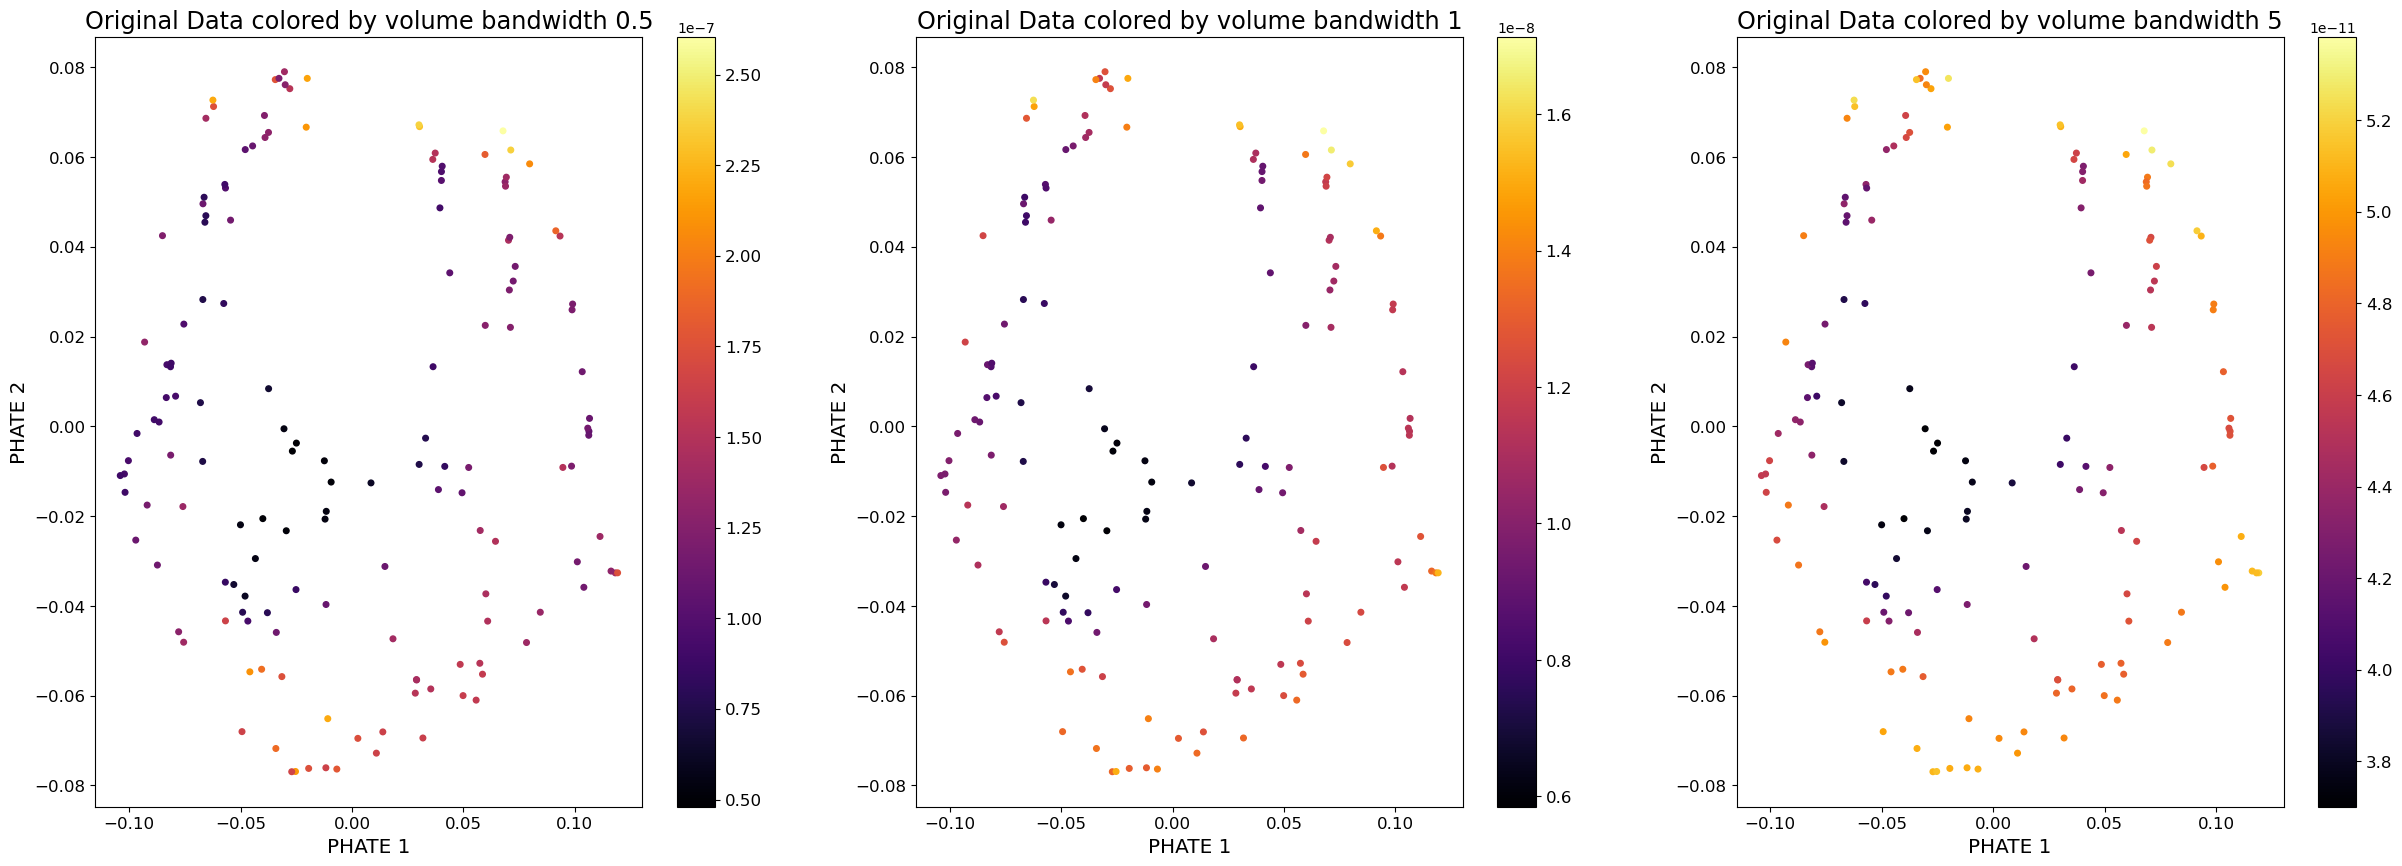

In [3]:
band_list = [0.5, 1, 5]
fig, axes = plt.subplots(1, len(band_list), figsize=(30, 10))
for idx, ax in enumerate(axes):
    fim_operator = FIM_noemb(kernel="gaussian", bandwidth=band_list[idx], t=1)
    V = fim_operator.get_volume(X)
    scprep.plot.scatter2d(
        phate_sphere,
        c=V,
        title="Original Data colored by volume bandwidth " + str(band_list[idx]),
        xlabel="PHATE 1",
        ylabel="PHATE 2",
        ax=ax,
    )